In [473]:
import pandas as pd
import chardet
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [474]:
loc = "listings.csv"

# def get_encoding(loc):
#     """Reads encoding from given file."""
#     with open(loc, "rb") as f:
#         result = chardet.detect(f.read())
#         return result["encoding"]
    
# encoding = get_encoding(loc)
# print(encoding)

In [475]:
data = pd.read_csv(loc, encoding="MacRoman")
df = pd.DataFrame(data)

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37541 entries, 0 to 37540
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37541 non-null  int64  
 1   listing_url                                   37541 non-null  object 
 2   scrape_id                                     37541 non-null  int64  
 3   last_scraped                                  37541 non-null  object 
 4   source                                        37541 non-null  object 
 5   name                                          37539 non-null  object 
 6   description                                   36221 non-null  object 
 7   neighborhood_overview                         20891 non-null  object 
 8   picture_url                                   37540 non-null  object 
 9   host_id                                       37541 non-null 

In [477]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.754100e+04,3.754100e+04,3.754100e+04,37536.000000,37536.000000,37541.000000,37541.000000,37541.000000,22790.000000,31700.000000,...,26000.000000,25986.000000,25995.000000,25983.000000,25984.000000,37541.000000,37541.000000,37541.000000,37541.000000,26001.000000
mean,3.783277e+17,2.024090e+13,1.682797e+08,210.164509,294.218057,40.728722,-73.946982,2.760262,1.187297,1.385363,...,4.656433,4.831447,4.825776,4.741619,4.642455,56.169974,29.927972,24.236701,0.058363,0.892457
std,4.643902e+17,0.000000e+00,1.820582e+08,830.651876,1050.908535,0.056340,0.054604,1.925977,0.551219,0.941462,...,0.501060,0.377703,0.407848,0.393922,0.486093,170.598777,136.427099,107.796624,0.547701,1.864734
min,2.595000e+03,2.024090e+13,1.678000e+03,1.000000,1.000000,40.500366,-74.251907,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.063928e+07,2.024090e+13,1.705622e+07,1.000000,1.000000,40.688491,-73.983108,2.000000,1.000000,1.000000,...,4.530000,4.810000,4.820000,4.650000,4.530000,1.000000,0.000000,0.000000,0.000000,0.090000
50%,4.866104e+07,2.024090e+13,8.415508e+07,2.000000,3.000000,40.726090,-73.954540,2.000000,1.000000,1.000000,...,4.810000,4.950000,4.960000,4.850000,4.760000,2.000000,1.000000,1.000000,0.000000,0.320000
75%,8.450413e+17,2.024090e+13,3.052402e+08,9.000000,13.000000,40.762380,-73.927800,4.000000,1.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.940000,8.000000,2.000000,2.000000,0.000000,1.070000
max,1.237702e+18,2.024090e+13,5.992925e+08,4494.000000,9019.000000,40.911390,-73.713650,16.000000,15.500000,16.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,876.000000,876.000000,719.000000,12.000000,110.100000


In [478]:
df.duplicated().sum()

np.int64(0)

In [479]:
df.shape

(37541, 75)

In [480]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [481]:
df_test = df[["latitude", "longitude", "neighbourhood_group_cleansed", "property_type", "room_type", "price", "minimum_nights", "maximum_nights"]]

In [482]:
df_test = df_test.copy()

In [483]:
df_test["price"] = df_test["price"].str.replace(r"[^\d.]", "", regex=True).astype(float)

In [484]:
df_test.isnull().sum()

latitude                            0
longitude                           0
neighbourhood_group_cleansed        0
property_type                       0
room_type                           0
price                           14751
minimum_nights                      0
maximum_nights                      0
dtype: int64

In [485]:
df_test

,latitude,longitude,neighbourhood_group_cleansed,property_type,room_type,price,minimum_nights,maximum_nights
0,40.614310,-74.034440,Brooklyn,Private room in rental unit,Private room,89.0,31,33
1,40.639520,-74.014840,Brooklyn,Private room in rental unit,Private room,45.0,30,100
2,40.850030,-73.922810,Bronx,Private room in rental unit,Private room,107.0,30,1125
3,40.798718,-73.940093,Manhattan,Entire rental unit,Entire home/apt,140.0,120,365
4,40.668012,-73.985226,Brooklyn,Entire home,Entire home/apt,340.0,30,62
...,...,...,...,...,...,...,...,...
37536,40.676080,-73.796300,Queens,Private room in home,Private room,65.0,30,31
37537,40.766890,-73.871270,Queens,Entire rental unit,Entire home/apt,367.0,2,365
37538,40.762120,-73.873150,Queens,Private room in home,Private room,89.0,1,730
37539,40.821570,-73.807490,Bronx,Entire home,Entire home/apt,185.0,30,150


In [486]:
over_2k = df_test[df_test["price"] > 2000]

<Axes: xlabel='latitude', ylabel='longitude'>

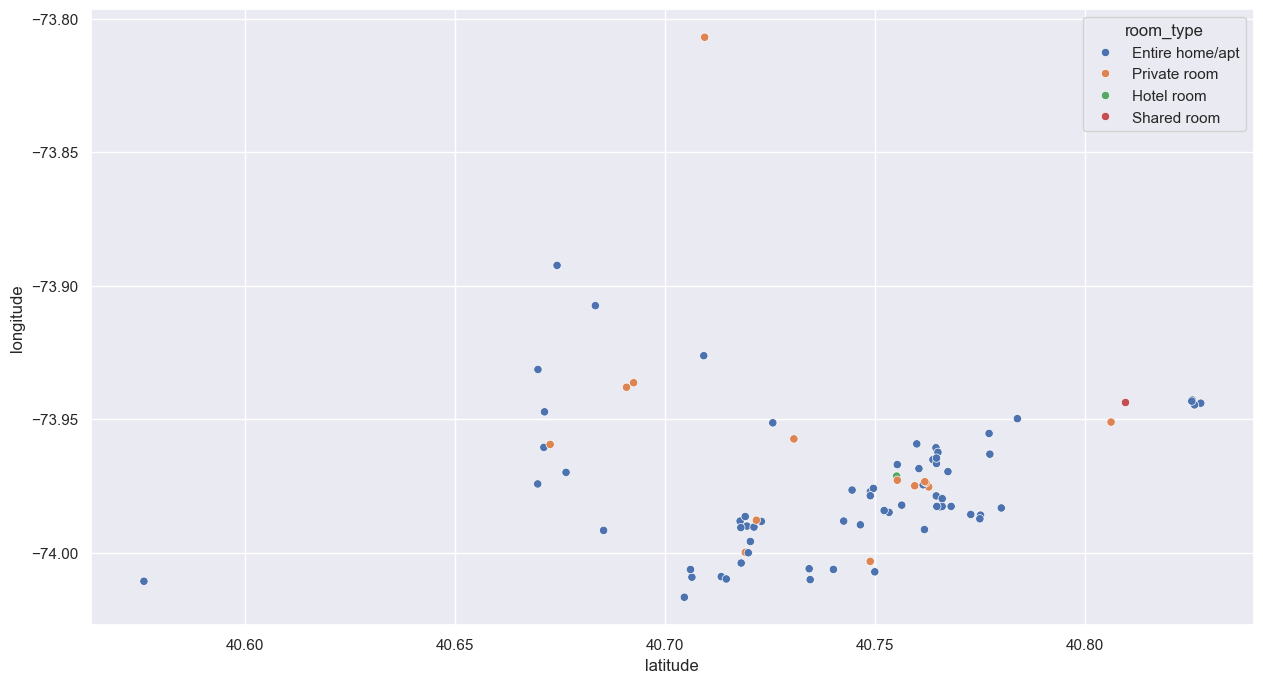

In [487]:
sns.set_theme()
plt.figure(figsize=(15, 8))
sns.scatterplot(over_2k, x="latitude", y="longitude", hue="room_type")

# Ich möchte nach AIRbnbs unter 2000$ betrachten

In [488]:
below_2_k = df_test[(df_test["price"] <= 2000) | (df_test["price"].isna())]


In [489]:
below_2_k

,latitude,longitude,neighbourhood_group_cleansed,property_type,room_type,price,minimum_nights,maximum_nights
0,40.614310,-74.034440,Brooklyn,Private room in rental unit,Private room,89.0,31,33
1,40.639520,-74.014840,Brooklyn,Private room in rental unit,Private room,45.0,30,100
2,40.850030,-73.922810,Bronx,Private room in rental unit,Private room,107.0,30,1125
3,40.798718,-73.940093,Manhattan,Entire rental unit,Entire home/apt,140.0,120,365
4,40.668012,-73.985226,Brooklyn,Entire home,Entire home/apt,340.0,30,62
...,...,...,...,...,...,...,...,...
37536,40.676080,-73.796300,Queens,Private room in home,Private room,65.0,30,31
37537,40.766890,-73.871270,Queens,Entire rental unit,Entire home/apt,367.0,2,365
37538,40.762120,-73.873150,Queens,Private room in home,Private room,89.0,1,730
37539,40.821570,-73.807490,Bronx,Entire home,Entire home/apt,185.0,30,150


In [490]:
below_2_k["price"].mean()

np.float64(208.34510857595913)

In [491]:
below_2_k_grouped = below_2_k.groupby(by=["neighbourhood_group_cleansed", "room_type"]).mean(numeric_only=True)
below_2_k_grouped

latitude  longitude  \
neighbourhood_group_cleansed room_type                               
Bronx                        Entire home/apt  40.850495 -73.877126   
                             Private room     40.848220 -73.882965   
                             Shared room      40.852231 -73.884020   
Brooklyn                     Entire home/apt  40.680896 -73.953363   
                             Hotel room       40.723815 -73.955419   
                             Private room     40.680566 -73.944753   
                             Shared room      40.674958 -73.941212   
Manhattan                    Entire home/apt  40.758164 -73.978513   
                             Hotel room       40.759050 -73.982379   
                             Private room     40.774355 -73.969864   
                             Shared room      40.777429 -73.968224   
Queens                       Entire home/apt  40.719905 -73.853023   
                             Hotel room       40.753144 -73.935124   
                             Private room     40.729076 -73.864434   
                             Shared room      40.735987 -73.851586   
Staten Island                Entire home/apt  40.607186 -74.111117   
                             Private room     40.617456 -74.111386   
                             Shared room      40.623086 -74.137488   

                                                   price  minimum_nights  \
neighbourhood_group_cleansed room_type                                     
Bronx                        Entire home/apt  167.864865       29.939525   
                             Private room      85.819473       28.233288   
                             Shared room      116.133333       30.476190   
Brooklyn                     Entire home/apt  228.251401       30.086673   
                             Hotel room       823.125000        2.380952   
                             Private room     103.148365       29.142177   
                             Shared room       87.900990       28.318182   
Manhattan                    Entire home/apt  317.704988       30.558835   
                             Hotel room       426.852843        3.286275   
                             Private room     189.949982       25.592296   
                             Shared room       99.746269       35.149351   
Queens                       Entire home/apt  188.466904       30.284453   
                             Hotel room              NaN        1.000000   
                             Private room      91.775265       30.241379   
                             Shared room       77.245283       27.780488   
Staten Island                Entire home/apt  167.343750       33.934426   
                             Private room      91.259740       24.646067   
                             Shared room      114.000000       23.000000   

                                              maximum_nights  
neighbourhood_group_cleansed room_type                        
Bronx                        Entire home/apt      549.736501  
                             Private room         497.281037  
                             Shared room          505.000000  
Brooklyn                     Entire home/apt     3521.239537  
                             Hotel room           971.428571  
                             Private room         533.733381  
                             Shared room          552.175325  
Manhattan                    Entire home/apt   206399.245305  
                             Hotel room          1000.407843  
                             Private room         580.417380  
                             Shared room          665.746753  
Queens                       Entire home/apt      536.424718  
                             Hotel room           499.285714  
                             Private room         588.828755  
                             Shared room          453.634146  
Staten Island                Entire home/apt      542.

<Axes: xlabel='minimum_nights', ylabel='price'>

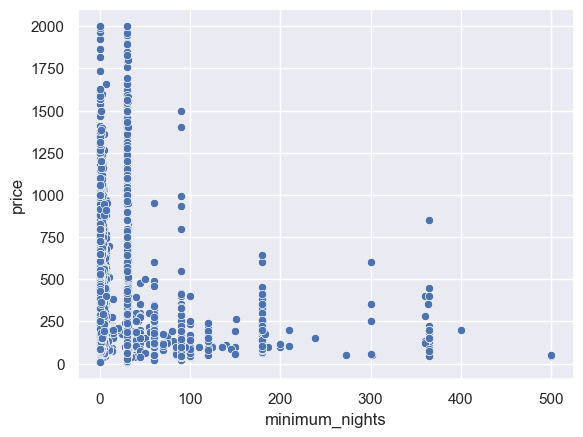

In [492]:
sns.scatterplot(below_2_k, x="minimum_nights", y="price")

In [504]:
min_nights = below_2_k.groupby("minimum_nights").agg({"price": "mean"})
min_nights = min_nights[min_nights["price"] < 800]
min_nights

,price
minimum_nights,
1,349.041795
2,255.920690
3,275.211974
4,289.732057
5,285.279330
...,...
360,233.500000
364,227.500000
365,167.250000


<Axes: xlabel='minimum_nights', ylabel='price'>

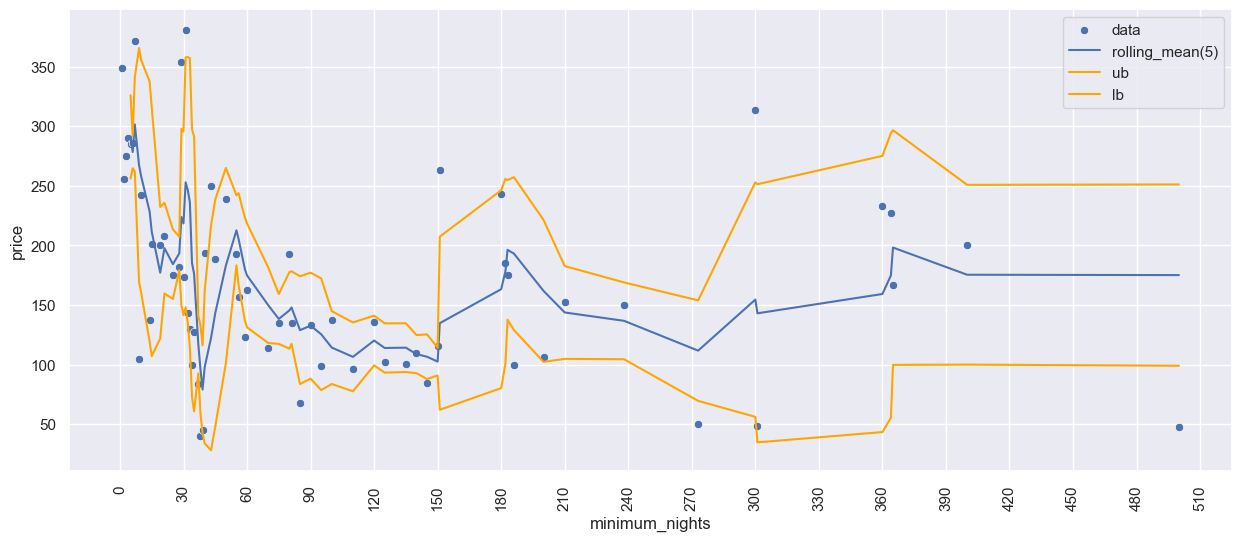

In [507]:
plt.figure(figsize=(15,6))

prices_per_night = below_2_k.groupby('minimum_nights').price.mean()
prices_per_night = prices_per_night[prices_per_night < 800]

plt.xticks(ticks=range(0, 511, 30), rotation=90)
sns.scatterplot(prices_per_night, label='data')

rolling_mean = prices_per_night.rolling(5).mean()
rolling_std = prices_per_night.rolling(5).std()

sns.lineplot(rolling_mean, label="rolling_mean(5)")
sns.lineplot(rolling_mean + rolling_std, label="ub", color='orange')
sns.lineplot(rolling_mean - rolling_std, label="lb", color='orange')

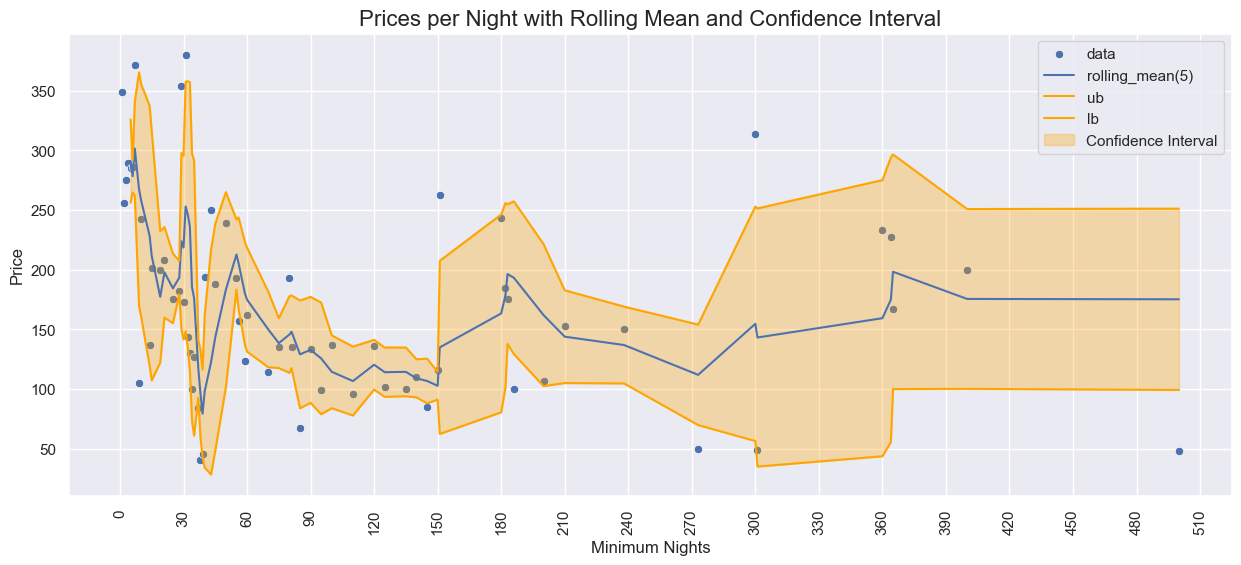

In [508]:
plt.figure(figsize=(15, 6))

# Gruppieren und Filtern
prices_per_night = below_2_k.groupby('minimum_nights').price.mean()
prices_per_night = prices_per_night[prices_per_night < 800]

# X-Achsenticks
plt.xticks(ticks=range(0, 511, 30), rotation=90)

# Scatterplot der Daten
sns.scatterplot(x=prices_per_night.index, y=prices_per_night, label='data')

# Rolling Mean und Standardabweichung
rolling_mean = prices_per_night.rolling(5).mean()
rolling_std = prices_per_night.rolling(5).std()

# Linienplot
sns.lineplot(x=prices_per_night.index, y=rolling_mean, label="rolling_mean(5)")
sns.lineplot(x=prices_per_night.index, y=rolling_mean + rolling_std, label="ub", color='orange')
sns.lineplot(x=prices_per_night.index, y=rolling_mean - rolling_std, label="lb", color='orange')

# Bereich zwischen lb und ub ausfüllen
plt.fill_between(
    prices_per_night.index, 
    rolling_mean - rolling_std, 
    rolling_mean + rolling_std, 
    color='orange', 
    alpha=0.3,   # Transparenz
    label="Confidence Interval"
)

# Titel und Achsenbeschriftungen
plt.title("Prices per Night with Rolling Mean and Confidence Interval", fontsize=16)
plt.xlabel("Minimum Nights", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Legende und Anzeige
plt.legend()
plt.show()


In [495]:
min_nights.rolling(5).mean()

,price
minimum_nights,
1,NaN
2,NaN
3,NaN
4,NaN
5,291.037169
...,...
480,NaN
500,NaN
650,NaN


Text(0, 0.5, 'Price')

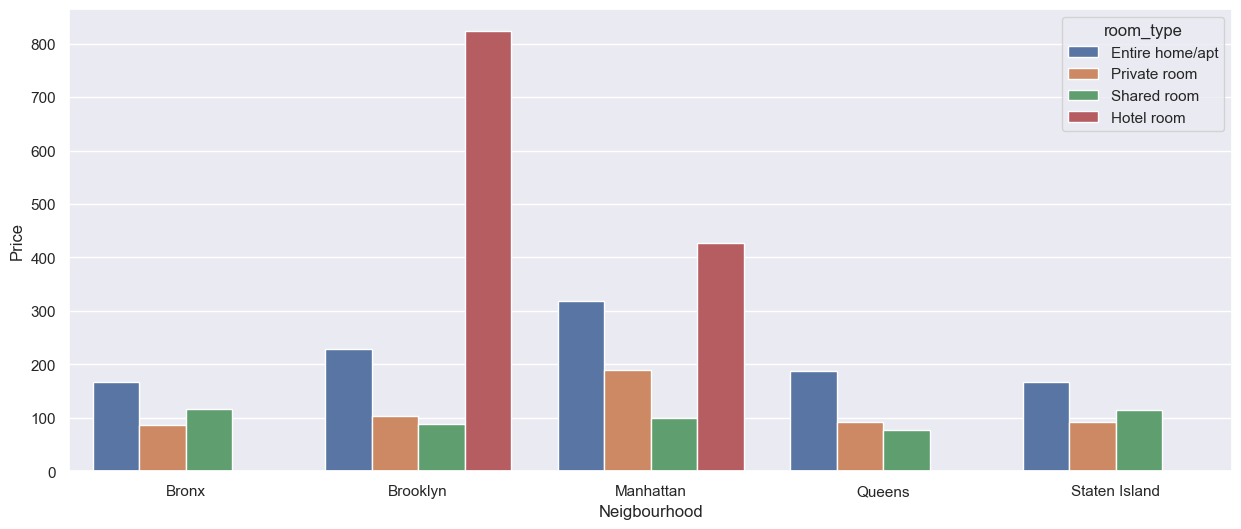

In [496]:
plt.figure(figsize=(15, 6))
sns.barplot(below_2_k_grouped, y="price", x="neighbourhood_group_cleansed", hue="room_type")

plt.xlabel("Neigbourhood")
plt.ylabel("Price")

<Axes: xlabel='neighbourhood_group_cleansed', ylabel='price'>

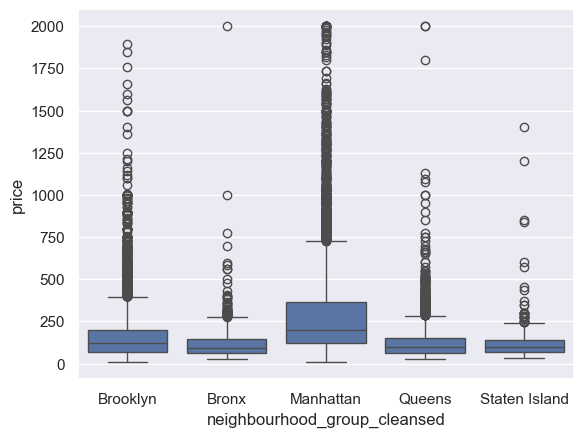

In [497]:
sns.boxplot(below_2_k, x="neighbourhood_group_cleansed", y="price")

<Axes: ylabel='price'>

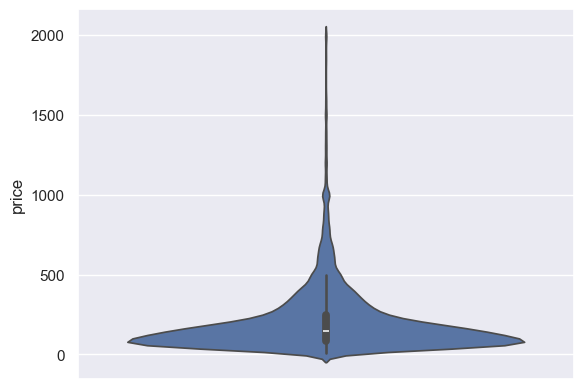

In [498]:
sns.violinplot(below_2_k, y="price")

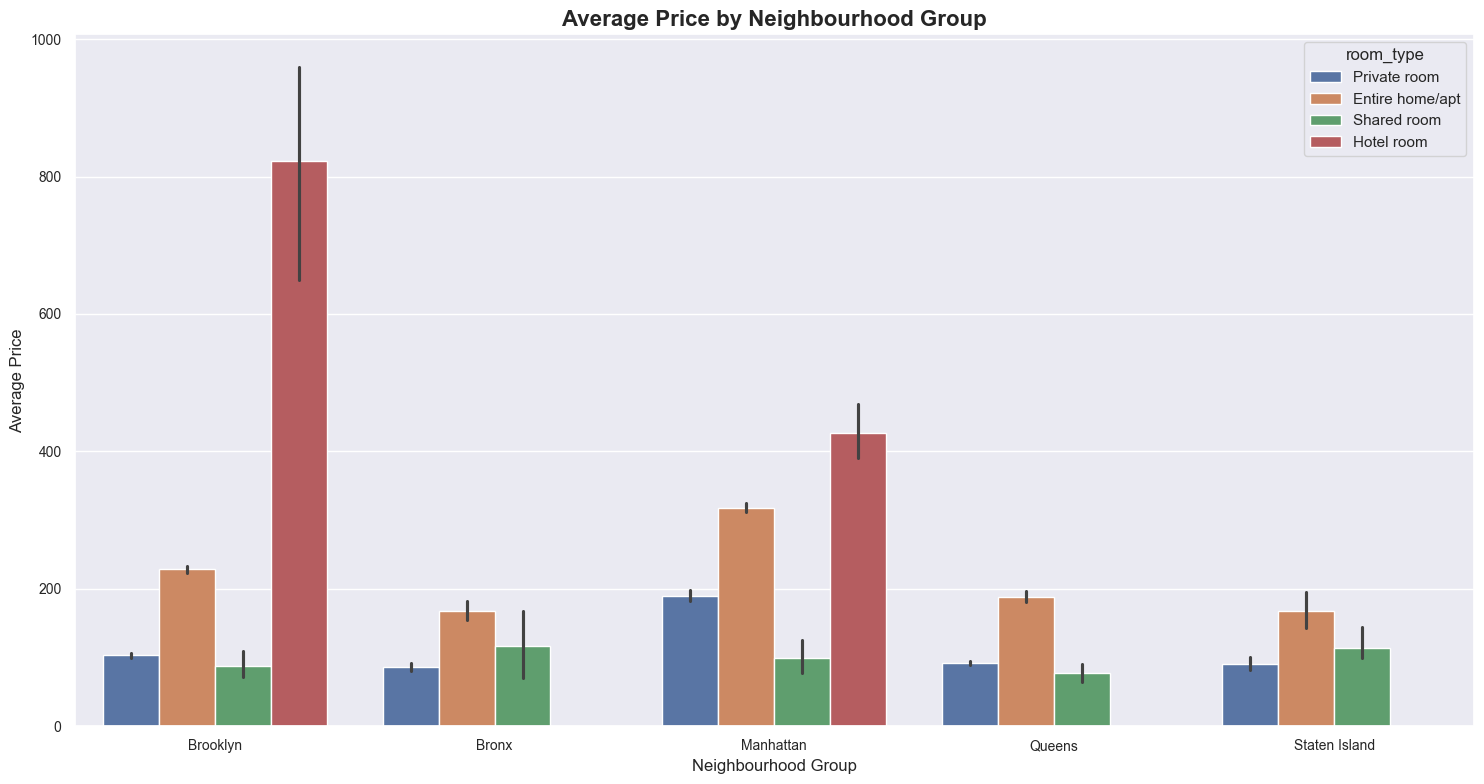

In [499]:
plt.figure(figsize=(15, 8))  # Größe des Plots anpassen
sns.barplot(
    data=below_2_k,
    x="neighbourhood_group_cleansed",
    y="price",
    hue="room_type"
)

# Titel und Achsenbeschriftungen
plt.title("Average Price by Neighbourhood Group", fontsize=16, fontweight="bold")
plt.xlabel("Neighbourhood Group", fontsize=12)
plt.ylabel("Average Price", fontsize=12)

# Achsenticks anpassen
plt.xticks(fontsize=10)  # X-Achse: Schriftgröße und Rotation
plt.yticks(fontsize=10)               # Y-Achse: Schriftgröße

# Plot anzeigen
plt.tight_layout()  # Verhindert abgeschnittene Beschriftungen
plt.show()

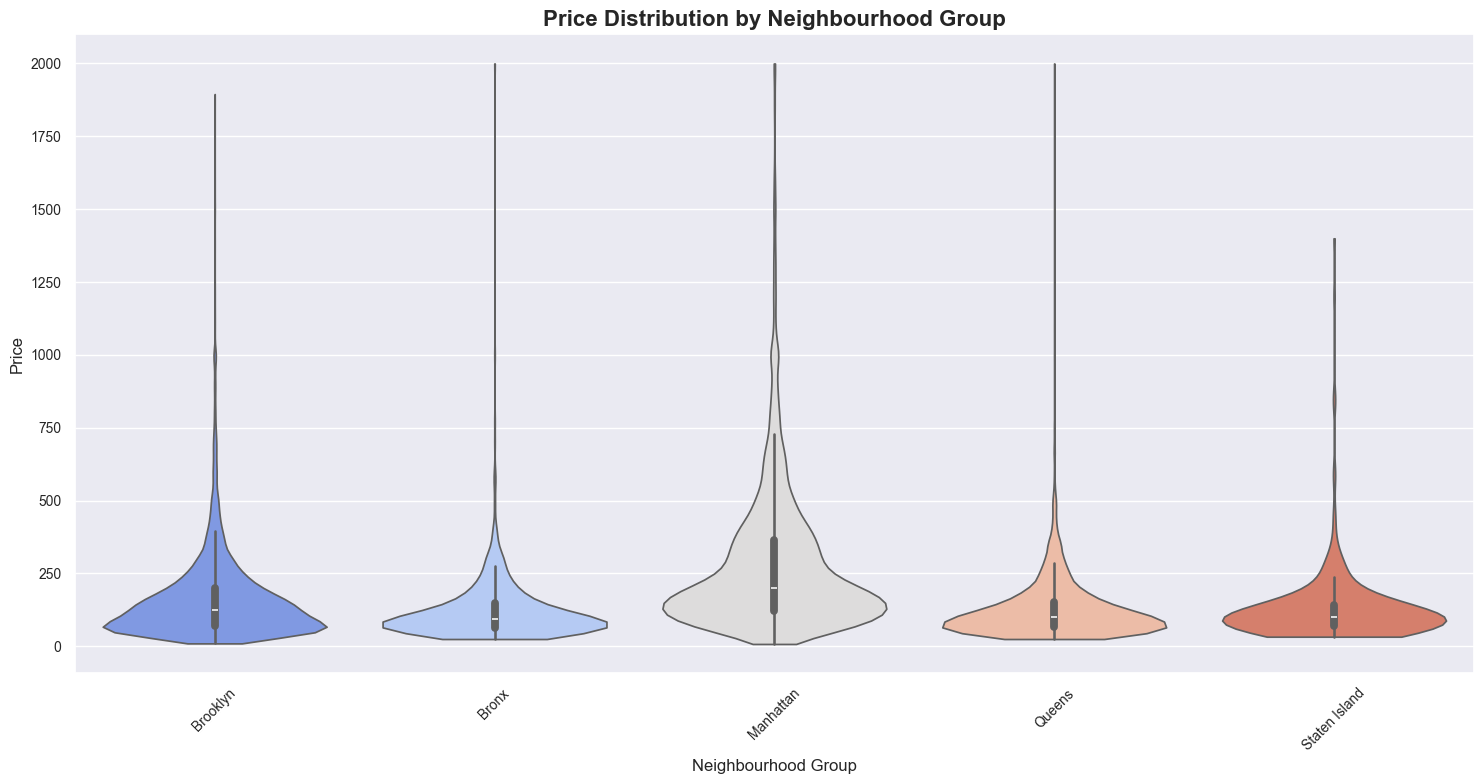

In [500]:
# Größe des Plots anpassen
plt.figure(figsize=(15, 8))

# Violinplot erstellen
sns.violinplot(
    data=below_2_k,
    x="neighbourhood_group_cleansed",
    y="price",
    hue="neighbourhood_group_cleansed",
    palette="coolwarm",  # Farbpalette
    cut=0
)

# Titel und Achsenbeschriftungen
plt.title("Price Distribution by Neighbourhood Group", fontsize=16, fontweight="bold")
plt.xlabel("Neighbourhood Group", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Achsenticks anpassen
plt.xticks(fontsize=10, rotation=45)  # X-Achse: Schriftgröße und Rotation
plt.yticks(fontsize=10)               # Y-Achse: Schriftgröße

# Layout optimieren
plt.tight_layout()  # Verhindert abgeschnittene Beschriftungen
plt.show()

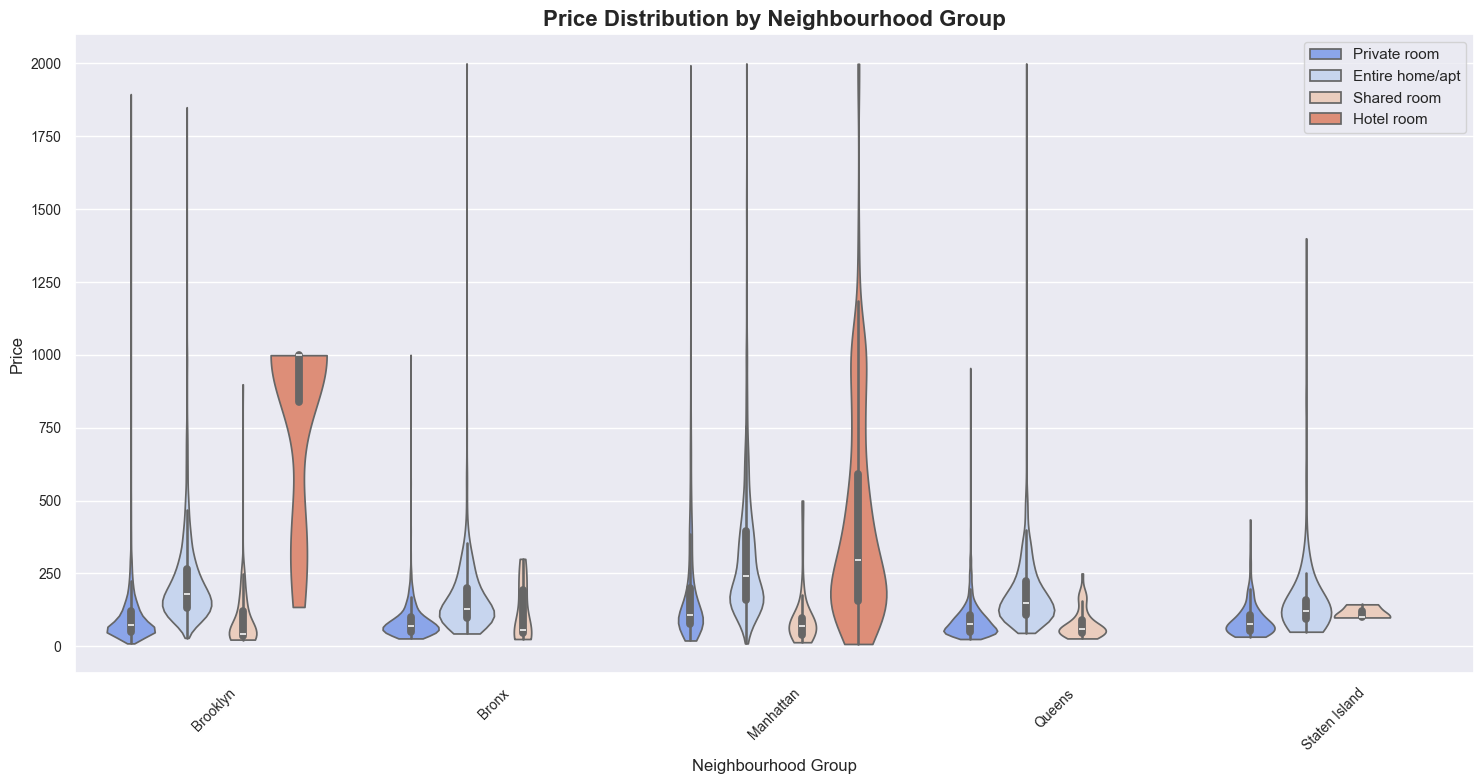

In [501]:
# Größe des Plots anpassen
plt.figure(figsize=(15, 8))

# Violinplot erstellen
sns.violinplot(
    data=below_2_k,
    x="neighbourhood_group_cleansed",
    y="price",
    hue="room_type",
    palette="coolwarm",  # Farbpalette
    cut=0
)

# Titel und Achsenbeschriftungen
plt.title("Price Distribution by Neighbourhood Group", fontsize=16, fontweight="bold")
plt.xlabel("Neighbourhood Group", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Achsenticks anpassen
plt.xticks(fontsize=10, rotation=45)  # X-Achse: Schriftgröße und Rotation
plt.yticks(fontsize=10)               # Y-Achse: Schriftgröße

# Layout optimieren
plt.legend(loc="upper right")
plt.tight_layout()  # Verhindert abgeschnittene Beschriftungen
plt.show()

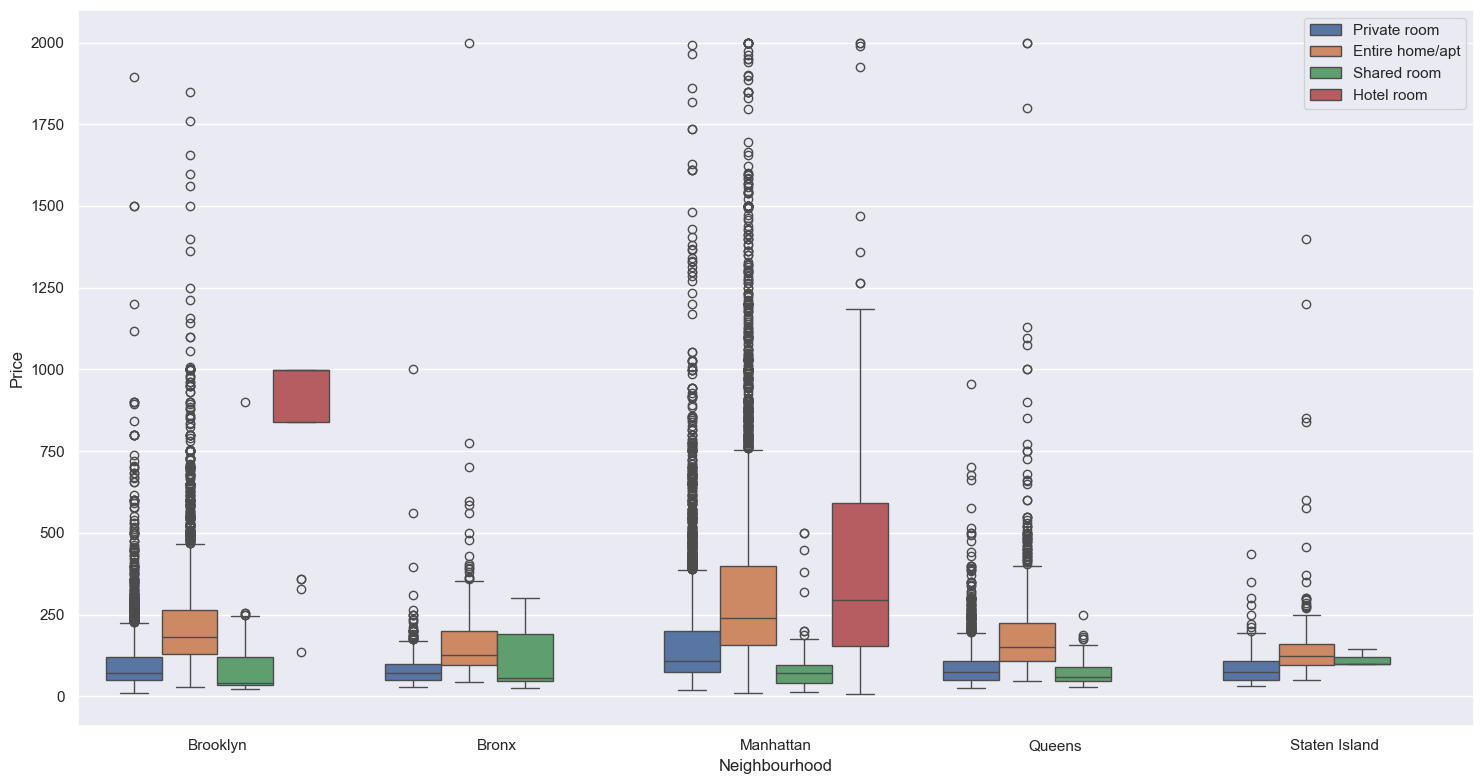

In [502]:
plt.figure(figsize=(15, 8))
sns.boxplot(below_2_k, x="neighbourhood_group_cleansed", y="price", hue="room_type")

plt.xlabel("Neighbourhood")
plt.ylabel("Price")

plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

(array([1.5526e+04, 4.6510e+03, 1.4460e+03, 5.6700e+02, 2.6800e+02,
        8.9000e+01, 5.6000e+01, 4.9000e+01, 1.5000e+01, 3.6000e+01]),
 array([   8. ,  207.2,  406.4,  605.6,  804.8, 1004. , 1203.2, 1402.4,
        1601.6, 1800.8, 2000. ]),
 <BarContainer object of 10 artists>)

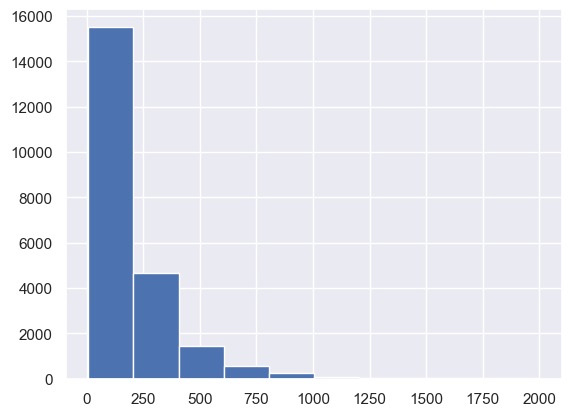

In [503]:
plt.hist(below_2_k["price"], bins=10)